<h1 align='center'><b>Введение в нейронные сети<b></h1>

<h1 align='left'>Урок 3.TensorFlow</h1>

<h2 align='center'>Практическое задание</h2>

<ol>
    <lu>1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. <br>
    Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?<br>
    </li>    
    <lu>2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.</li><br>       
    <lu>3.* Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность? </li>   
</ol>

In [1]:
# !pip install tensorflow

In [2]:
# from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam, SGD


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(tf.__version__)

2.9.2


In [3]:
# tf.config.list_physical_devices('GPU')

In [4]:
# !nvidia-smi

In [5]:
from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
len(X_train)

60000

In [9]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
len(y_test_labels)

10000

In [12]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

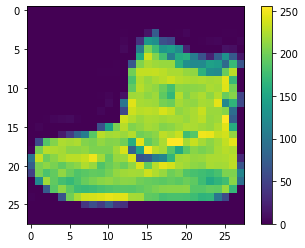

In [14]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Посмотрим первые 25 изображений:

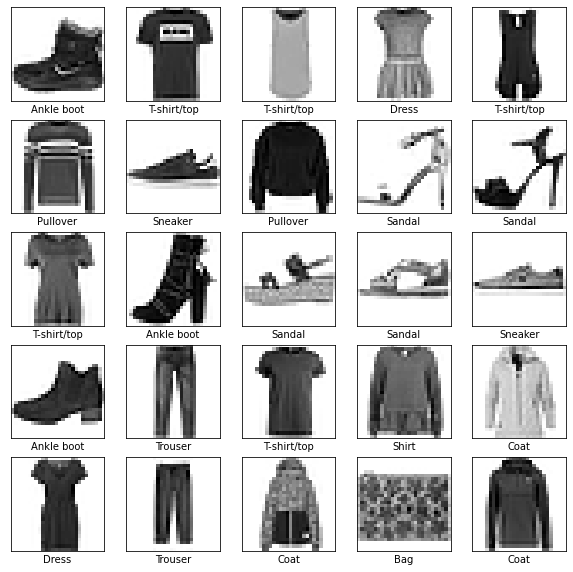

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

Соберем модель в функциональной форме (функциональное API Keras) 

Сеть собираем как последовательности соединей узлов:
 
 вход -> слой 1 -> слой 2 -> выход

 связь идет через тензоры

In [17]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10) 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [18]:
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [19]:
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/5
235/235 [==============================] - 4s 4ms/step - loss: 0.6178 - accuracy: 0.7956 - val_loss: 0.4952 - val_accuracy: 0.8329
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4267 - accuracy: 0.8522 - val_loss: 0.4400 - val_accuracy: 0.8461
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3891 - accuracy: 0.8628 - val_loss: 0.4266 - val_accuracy: 0.8513
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3606 - accuracy: 0.8723 - val_loss: 0.3844 - val_accuracy: 0.8636
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8776 - val_loss: 0.3746 - val_accuracy: 0.8684


In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3746 - accuracy: 0.8684 - 596ms/epoch - 2ms/step

Test accuracy: 0.868399977684021


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

In [21]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 78ms/step


array([[-5.1347003 , -7.218431  , -4.6093    , -5.9537826 , -7.4528036 ,
         3.5670433 , -3.0760686 ,  4.0713334 , -0.55963004,  5.807786  ]],
      dtype=float32)

In [22]:
y_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [23]:
probability_model = Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [24]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [25]:
predictions[0]

array([1.37729085e-05, 1.71424335e-06, 2.32918519e-05, 6.07158881e-06,
       1.35608218e-06, 8.28217939e-02, 1.07913875e-04, 1.37137011e-01,
       1.33644987e-03, 7.78550625e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

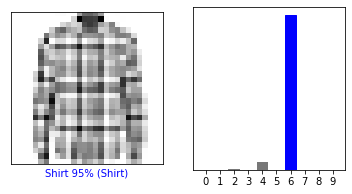

In [28]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test_labels, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test_labels)
plt.show()

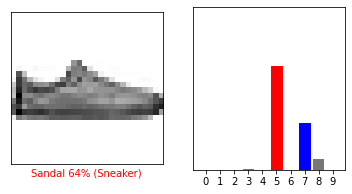

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test_labels, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний

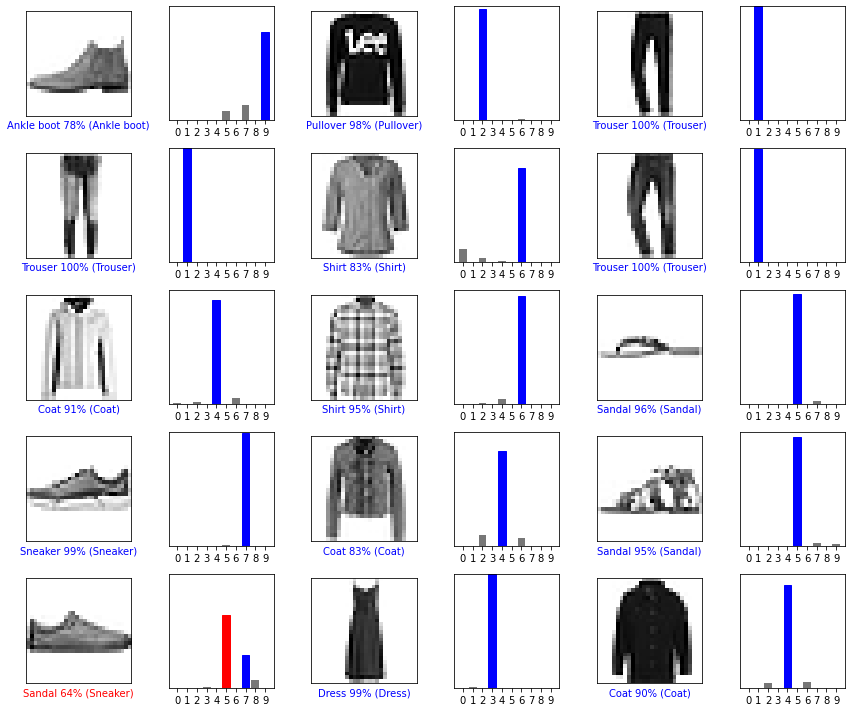

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test_labels)

plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборки и посмотрим предсказание нейронной сети.

In [31]:
i = 0
img = X_test[i]

print(img.shape)

(28, 28)


In [32]:
# Add the image to a batch where it's the only member
imgs = np.expand_dims(img, 0)

print(imgs.shape)

print(img.reshape((1, img.shape[0], img.shape[0])).shape)
print(img[None].shape)

(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(imgs)

predictions_single

1/1 [==============================] - 0s 18ms/step


array([[1.3772907e-05, 1.7142448e-06, 2.3291850e-05, 6.0715934e-06,
        1.3560820e-06, 8.2821786e-02, 1.0791396e-04, 1.3713713e-01,
        1.3364515e-03, 7.7855057e-01]], dtype=float32)

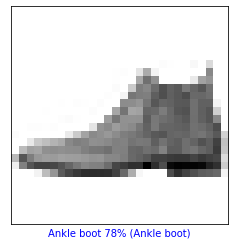

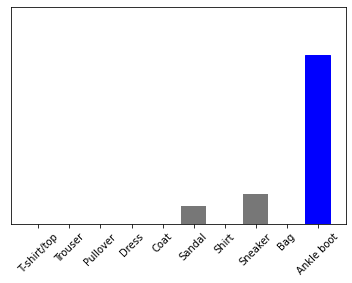

In [34]:
plot_image(i, predictions, y_test_labels, X_test)
plt.show()
plot_value_array(i, predictions_single, y_test_labels)
plt.xticks(range(10), class_names, rotation=45);

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [35]:
np.argmax(predictions_single[0])

9

Нейросеть при хорошо подобранных параметрах должна выдать корректное предсказание

## Сделаем анализ ошибок модели

In [36]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred[:10]

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [37]:
# # Матрица в виде таблицы
CM = confusion_matrix(y_test_labels, y_pred)
print(CM)

[[843   3  13  25   2   0 102   0  12   0]
 [  4 964   2  20   4   0   4   0   2   0]
 [ 20   1 747   9 119   0 100   0   4   0]
 [ 31  16  12 861  41   0  33   0   6   0]
 [  1   0  83  27 796   0  89   0   4   0]
 [  0   0   0   1   0 953   0  32   2  12]
 [154   2  78  23  65   0 663   0  15   0]
 [  0   0   0   0   0  25   0 960   0  15]
 [  5   1   4   4   6   2   6   5 967   0]
 [  1   0   0   0   0  12   2  55   0 930]]


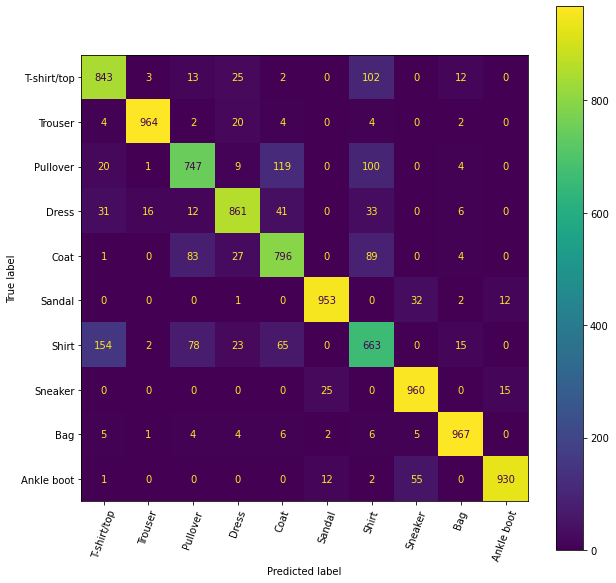

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

Сеть делает ошибки. Можно их попробовать исправить, если сделать комбинацию сетей (ансамбль) . Проверим вариант усреднения.

# **Ансамбль сетей**

Использование функционального API для построения сложных сетей

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание


Реализуем одинаковые сети в разном стиле:
- model1 - линейная модель через список
- model2 - линейная модель через добавление слоев по очереди
- model3 - модель через функциональное описание


In [39]:
# заполняем модель списком
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# заполняем модель, добавляя слои последовательно 
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))


# Заполняем модель, формируя граф передачи тензоров
input = Input(shape=(28, 28))
x = Flatten()(input)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model3 = Model(input, output)

In [40]:
model1.compile(optimizer='rmsprop',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
model3.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])


hist1 = model1.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))
print()
hist2 = model2.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))
print()
hist3 = model3.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6574 - accuracy: 0.7729 - val_loss: 0.5688 - val_accuracy: 0.7945
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.4491 - accuracy: 0.8402 - val_loss: 0.4604 - val_accuracy: 0.8278
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8583 - val_loss: 0.4311 - val_accuracy: 0.8496
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3641 - accuracy: 0.8675 - val_loss: 0.4359 - val_accuracy: 0.8448
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8757 - val_loss: 0.3966 - val_accuracy: 0.8583

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6326 - accuracy: 0.7794 - val_loss: 0.5364 - val_accuracy: 0.8180
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.8474 - val_loss: 0.4758 - val_accuracy: 0.8260
Epoch 3/5
23

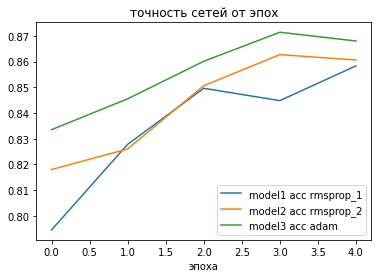

In [41]:
plt.plot(hist1.history['val_accuracy'], label='model1 acc rmsprop_1')
plt.plot(hist2.history['val_accuracy'], label='model2 acc rmsprop_2')
plt.plot(hist3.history['val_accuracy'], label='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

In [42]:
y_pred1 = np.argmax(model1.predict(X_test), axis=1)
y_pred2 = np.argmax(model2.predict(X_test), axis=1)
y_pred3 = np.argmax(model3.predict(X_test), axis=1)

CM1 = confusion_matrix(y_test_labels, y_pred1)
CM2 = confusion_matrix(y_test_labels, y_pred2)
CM3 = confusion_matrix(y_test_labels, y_pred3)

313/313 [==============================] - 1s 2ms/step


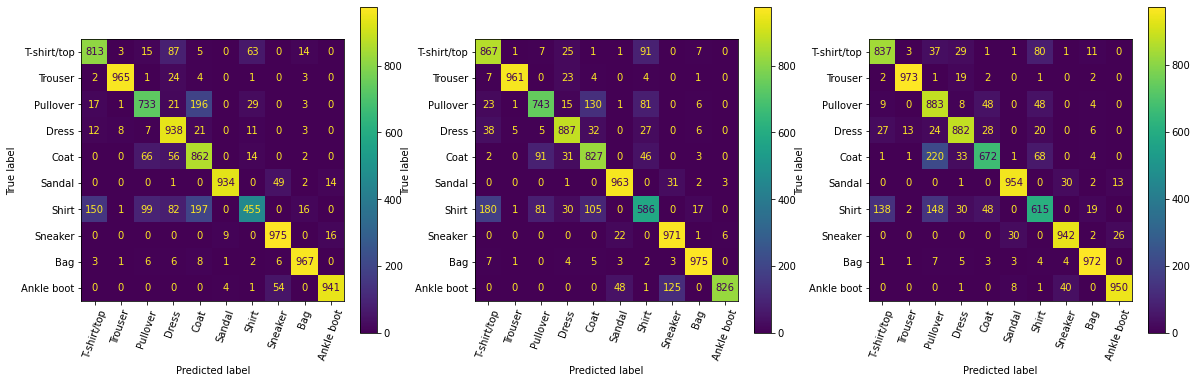

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=class_names)
disp1.plot(ax=ax1, values_format='.3g')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)

disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=class_names)
disp2.plot(ax=ax2, values_format='.3g')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)

disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=class_names)
disp3.plot(ax=ax3, values_format='.3g')
plt.xticks(rotation=70)

plt.show()

In [44]:
# сохранить модели на диск.
model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')

# прочитать модели с диска
# model = load_model('model.h5')

Сделаем предсказание на тестовом изображении

In [45]:
y_pred_proba = model3.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 [==============================] - 0s 1ms/step


Отобразим значения на выходах сети (10 выходов - 10 точек графика)

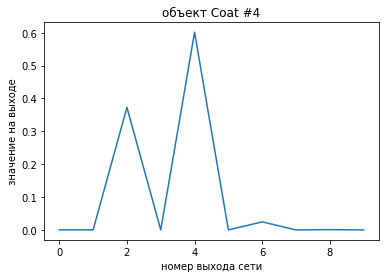

In [46]:
N = 10 
plt.plot(y_pred_proba[N, :])
plt.title(f'объект {class_names[y_test_labels[N]]} #{str(y_test_labels[N])}')
plt.xlabel('номер выхода сети')
plt.ylabel('значение на выходе')
plt.show()

In [47]:
test_loss, test_acc = model1.evaluate(X_test, y_test_labels, verbose=2)
test_loss, test_acc = model2.evaluate(X_test, y_test_labels, verbose=2)
test_loss, test_acc = model3.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 0.3966 - accuracy: 0.8583 - 584ms/epoch - 2ms/step
313/313 - 1s - loss: 0.3873 - accuracy: 0.8606 - 600ms/epoch - 2ms/step
313/313 - 1s - loss: 0.3661 - accuracy: 0.8680 - 613ms/epoch - 2ms/step


Усреднение моделей

In [48]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(128, activation='relu')(flat)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)


x2 = Dense(256, activation='relu')(flat)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)


x3 = Dense(256, activation='relu')(flat)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)


# усредняем выходы сетей
out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])
out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

In [49]:
model_all.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_4 (Flatten)            (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 128)          100480      ['flatten_4[0][0]']              
                                                                                                  
 dense_10 (Dense)               (None, 256)          200960      ['flatten_4[0][0]']              
                                                                                            

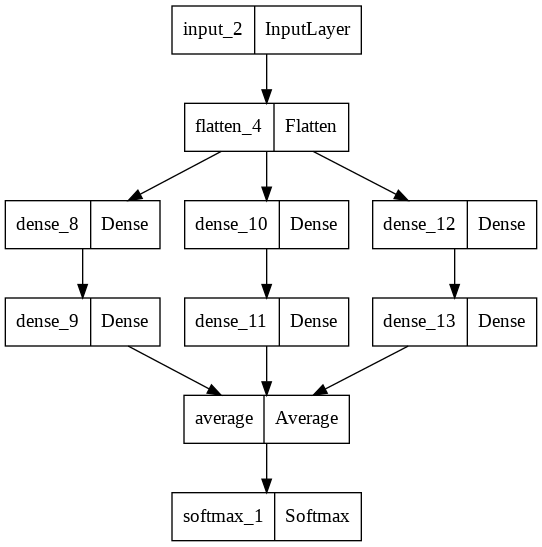

In [50]:
plot_model(model_all)

In [51]:
predictions_single = model_all.predict(imgs)
predictions_single

1/1 [==============================] - 0s 79ms/step


array([[0.08852653, 0.08852337, 0.08852427, 0.08852343, 0.08852376,
        0.09936997, 0.088526  , 0.11224996, 0.08888987, 0.1683429 ]],
      dtype=float32)

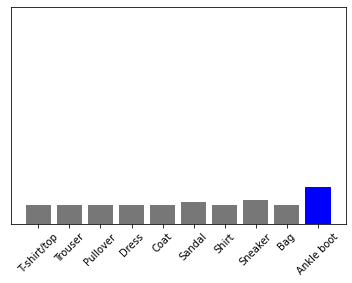

In [52]:
plot_value_array(0, predictions_single, y_test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 2.2026 - accuracy: 0.8759 - 855ms/epoch - 3ms/step


313/313 [==============================] - 1s 2ms/step


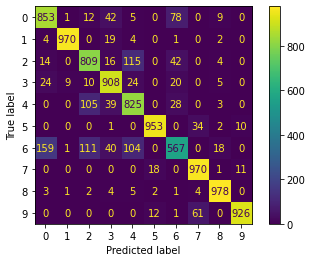

In [54]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [55]:
hist1 = model_all.fit(X_train, y_train_labels,
                      epochs=5,
                      batch_size=256,
                      validation_data=(X_test, y_test_labels))

Epoch 1/5
235/235 [==============================] - 2s 4ms/step - loss: 2.1938 - accuracy: 0.8808 - val_loss: 2.1945 - val_accuracy: 0.8698
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 2.1915 - accuracy: 0.8862 - val_loss: 2.1937 - val_accuracy: 0.8705
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 2.1903 - accuracy: 0.8902 - val_loss: 2.1927 - val_accuracy: 0.8715
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 2.1896 - accuracy: 0.8939 - val_loss: 2.1921 - val_accuracy: 0.8756
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 2.1890 - accuracy: 0.8961 - val_loss: 2.1917 - val_accuracy: 0.8787


313/313 [==============================] - 1s 2ms/step


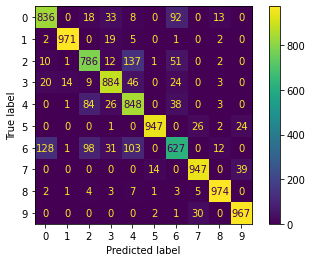

In [56]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [57]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 2.1917 - accuracy: 0.8787 - 645ms/epoch - 2ms/step


Поличилось улучшить accuracy с 0.8684 до 0.8787.
Далее попробуем дообучить модель

## Дообучение

Обучение только новых слоев. Старые слои моделей замораживаем и не обучаем.

In [58]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(128, activation='relu')(flat)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)
# не обучаем слои модели
for layer in model1.layers:
    layer.trainable = False


x2 = Dense(256, activation='relu')(flat)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)
# не обучаем слои модели
for layer in model2.layers:
    layer.trainable = False


x3 = Dense(256, activation='relu')(flat)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)
# не обучаем слои модели
for layer in model3.layers:
    layer.trainable = False


# усредняем выходы сетей
out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])
# добавляем новый обучаемый слой
# out_all = Dense(10, activation='relu')(out_all)

out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])


model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

model_all.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 128)          100480      ['flatten_5[0][0]']              
                                                                                                  
 dense_16 (Dense)               (None, 256)          200960      ['flatten_5[0][0]']              
                                                                                            

In [59]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 1.6348 - accuracy: 0.8759 - 848ms/epoch - 3ms/step


In [60]:
for layer in model_all.layers[:]:
    layer.trainable = True

model_all.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 128)          100480      ['flatten_5[0][0]']              
                                                                                                  
 dense_16 (Dense)               (None, 256)          200960      ['flatten_5[0][0]']              
                                                                                            

In [61]:
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

In [62]:
hist1 = model_all.fit(X_train, y_train_labels,
                      epochs=10,
                      batch_size=256,
                      validation_data=(X_test, y_test_labels))

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 1.5931 - accuracy: 0.8845 - val_loss: 1.6015 - val_accuracy: 0.8713
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5831 - accuracy: 0.8883 - val_loss: 1.5937 - val_accuracy: 0.8749
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5755 - accuracy: 0.8943 - val_loss: 1.5901 - val_accuracy: 0.8777
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5716 - accuracy: 0.8976 - val_loss: 1.5886 - val_accuracy: 0.8793
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5672 - accuracy: 0.9015 - val_loss: 1.5903 - val_accuracy: 0.8763
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5651 - accuracy: 0.9039 - val_loss: 1.5865 - val_accuracy: 0.8819
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5613 - accuracy: 0.9070 - val_loss: 1.5861 - val_accuracy: 0.8807
Epoch 

In [63]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 1.5856 - accuracy: 0.8809 - 628ms/epoch - 2ms/step


In [64]:
model_all.save('model_all.h5')

In [65]:
model_loaded = tf.keras.models.load_model('model_all.h5')
test_loss, test_acc = model_loaded.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 1.5856 - accuracy: 0.8809 - 747ms/epoch - 2ms/step


В итоге дообучения удалось улучшить значение accuracy с 0.8684 до 0,8809, т.е. на 1,25%.